In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
import cmath, random
import seaborn as sns
from math import sqrt 

Para resolver la parte determinista de las ecuaciones de Langevin lo hago por el método runge-kutta 4

In [9]:
def runge_kutta_sis(f1,g1,f2,g2,a,b,h):
    
    x0 = 0    #Condiciones iniciales
    y0 = 0

    v_x0 = 1
    v_y0 = 1
    
    t = np.arange(a,b+h,h)   #Tiempo definido por tiempo inicial, final y paso
    n = len(t)               #Elnúmero de interacciones viene dado por la longitud del vector de tiempo
        
    
    x = np.zeros(n)   #Defino el vector x
    y = np.zeros(n)   #Defino el vector y
    
    v_x = np.zeros(n)   #Defino el vector v_x
    v_y = np.zeros(n)   #Defino el vector v_y
    
    
    
    x[0] = x0  #Posición inicial
    y[0] = y0
    
    v_x[0] = v_x0  #Velocidad inicial
    v_y[0] = v_y0
    
    for i in range(n-1):
        k1 = h*f1(x[i],v_x[i],t[i])
        l1 = h*g1(x[i],v_x[i],t[i])
        k2 = h*f1(x[i]+k1/2,v_x[i]+l1/2,t[i]+h/2)
        l2 = h*g1(x[i]+k1/2,v_x[i]+l1/2,t[i]+h/2)
        k3 = h*f1(x[i]+k2/2,v_x[i]+l2/2,t[i]+h/2)
        l3 = h*g1(x[i]+k2/2,v_x[i]+l2/2,t[i]+h/2)
        k4 = h*f1(x[i]+k3,v_x[i]+l3,t[i]+h)
        l4 = h*g1(x[i]+k3,v_x[i]+l3,t[i]+h)
        x[i+1] = x[i]+(1/6)*(k1+2*k2+2*k3+k4)
        v_x[i+1] = v_x[i]+(1/6)*(l1+2*l2+2*l3+l4)

    for i in range(n-1):
        j1 = h*f2(y[i],v_y[i],t[i])
        s1 = h*g2(y[i],v_y[i],t[i])
        j2 = h*f2(y[i]+j1/2,v_y[i]+s1/2,t[i]+h/2)
        s2 = h*g2(y[i]+j1/2,v_y[i]+s1/2,t[i]+h/2)
        j3 = h*f2(y[i]+j2/2,v_y[i]+s2/2,t[i]+h/2)
        s3 = h*g2(y[i]+j2/2,v_y[i]+s2/2,t[i]+h/2)
        j4 = h*f2(y[i]+j3,v_y[i]+s3,t[i]+h)
        s4 = h*g2(y[i]+j3,v_y[i]+s3,t[i]+h)
        
        y[i+1] = y[i]+(1/6)*(j1+2*j2+2*j3+j4)
        v_y[i+1] = v_y[i]+(1/6)*(s1+2*s2+2*s3+s4)   
        

         
    return (x,v_x,y,v_y,t)

Defino la parte determinista de las ecuaciones de Langevin en 2D

In [10]:
gamma=1

# Para eje X
f1 = lambda x,v_x,t: v_x       
g1 = lambda x,v_x,t: (-gamma)*v_x

# Para eje Y
f2 = lambda y,v_y,t: v_y       
g2 = lambda y,v_y,t: (-gamma)*v_y

In [11]:
(x,v_x,y,v_y,t) = runge_kutta_sis(f1,g1,f2,g2,0,9.9,0.1)

Vamos a representar por separado posición y velocidad

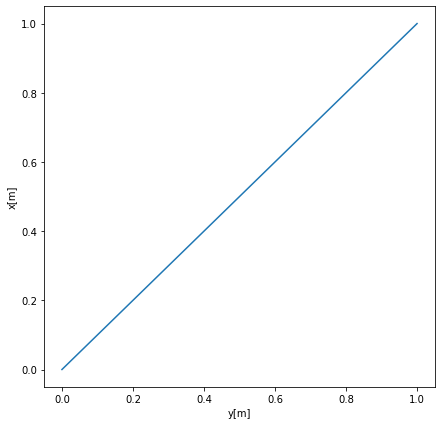

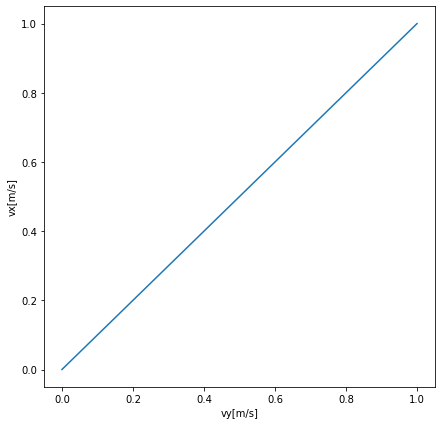

In [12]:
#Posicion

fig = plt.figure(figsize=(7, 7))
plt.plot(y,x)
plt.xlabel('y[m]')
plt.ylabel('x[m]')
plt.show() 
#plt.savefig('x_2D.png', bbox_inches='tight')

#Posicion

fig = plt.figure(figsize=(7, 7))
plt.plot(v_y,v_x)
plt.xlabel('vy[m/s]')
plt.ylabel('vx[m/s]')
plt.show() 
#plt.savefig('x_2D.png', bbox_inches='tight')

Voy a utilizar 3 tipos de funciones aleatorias

Funcion aleatoria uniforme

In [13]:
def UniformRandom(size):
    
    UniformDis = np.zeros(size)
    for i in range(size):
        UniformDis[i] = np.random.uniform(-1,1)
    return UniformDis

Text(0, 0.5, 'x[m]')

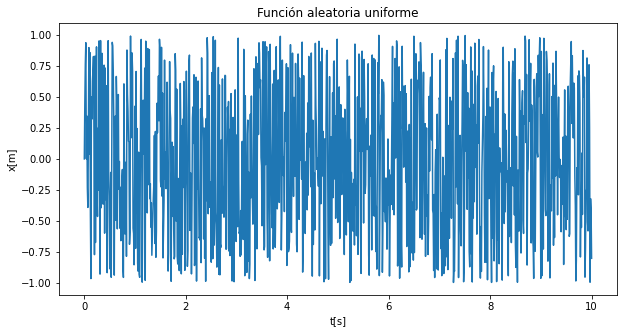

In [14]:
# 1D Brownian Motion
time_Uniform = np.linspace(0, 10,1000) #random time
d_Uniform = UniformRandom(len(time_Uniform))
d_Uniform[0]=0

fig = plt.figure(figsize=(10, 5))
plt.plot(time_Uniform, d_Uniform)
plt.title("Función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("x[m]")
#plt.savefig('RandomUniform.png', bbox_inches='tight')

In [15]:
d_Uniform.mean()

-0.026813291223449453

Función Gaussiana Normal

In [16]:
def Gaussian(size):
    
    GaussDis = np.zeros(size)
    for i in range(size):
        GaussDis[i] = np.random.normal(0,0.5)
    return GaussDis

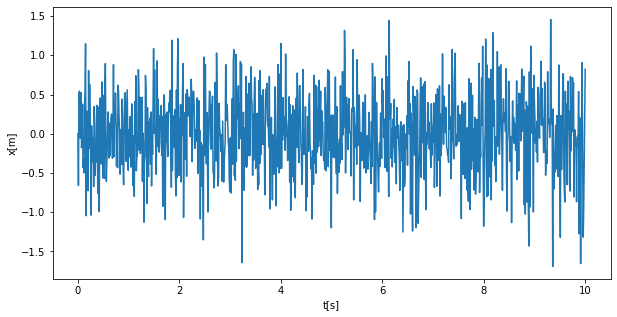

In [17]:
time_Gauss = np.linspace(0, 10,1000) #random time
d_Gauss = Gaussian(len(time_Gauss))
d_Gauss[0]=0

fig = plt.figure(figsize=(10, 5))
plt.plot(time_Gauss, d_Gauss)
#plt.title("Función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("x[m]")
plt.savefig('RandomGaussian.png', bbox_inches='tight')


Función Gaussiana normal acumulativa (teniendo en cuenta el valor inmediatamente anterior)

In [18]:
def NormalRandom(size):
    
    normDis = np.random.normal(0,1,size)
    normDis = np.cumsum(normDis)
    return normDis

Text(0, 0.5, 'x[m]')

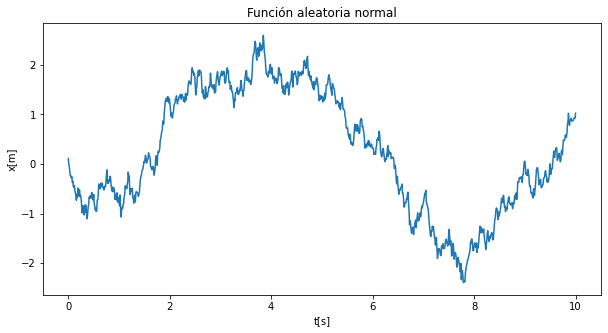

In [19]:
# 1D Brownian Motion
time_Normal = np.linspace(0, 10, 1000) #arbitrary time
d_Normal = NormalRandom(len(time_Normal))*0.1
d_Normal[0]
fig = plt.figure(figsize=(10, 5))
plt.plot(time_Normal, d_Normal)
plt.title("Función aleatoria normal")
plt.xlabel("t[s]")
plt.ylabel("x[m]")
#plt.savefig('1D BM.png', bbox_inches='tight')

# Resultados

Función aleatoria uniforme

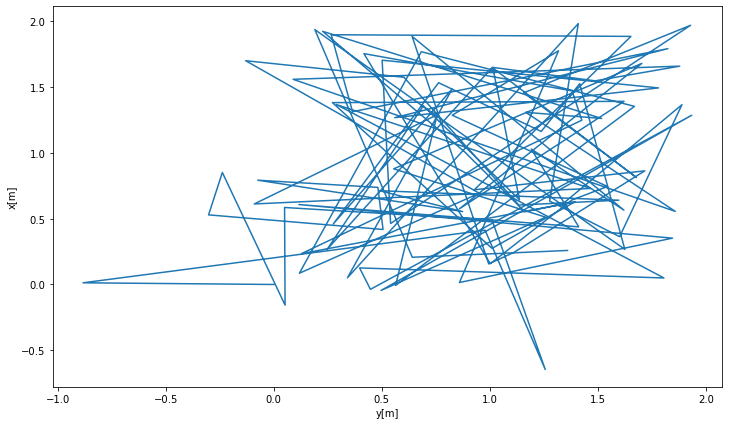

In [20]:
# Posición
time_uniform = np.linspace(0,10,100)
x_uniform_1 = UniformRandom(len(time_uniform)) + x  #Suma de la ecuación estocástica y la determinista
x_uniform_1[0]=0

y_uniform_1 = UniformRandom(len(time_uniform)) + y  
y_uniform_1[0]=0


fig = plt.figure(figsize=(12, 7))
plt.plot(y_uniform_1, x_uniform_1)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("y[m]")
plt.ylabel("x[m]")
plt.savefig('Posicion_uniforme_2D.png', bbox_inches='tight')

In [26]:
r_uniform=np.zeros(len(x_uniform_1))
for i in range (1,len(x_uniform_1)):
    r_uniform[i] = sqrt((x_uniform_1[i])**2+(y_uniform_1[i])**2)

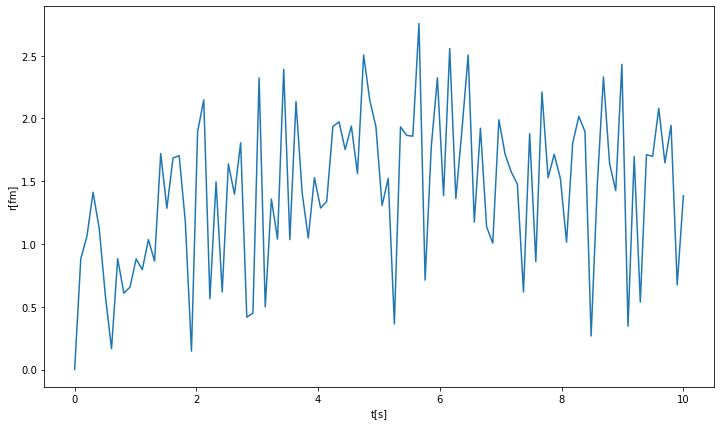

In [56]:
fig = plt.figure(figsize=(12, 7))
plt.plot(time_uniform, r_uniform)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("r[fm]")
plt.savefig('R_uniforme_2D.png', bbox_inches='tight')

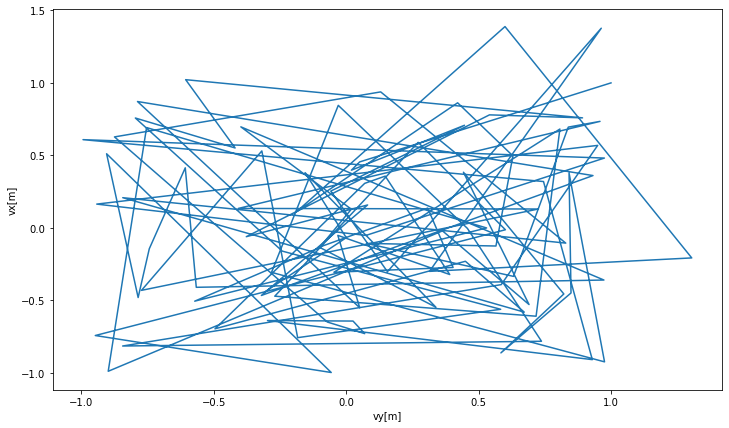

In [63]:
# Velocidad
time_uniform = np.linspace(0,10,100)
v_x_uniform_1 = UniformRandom(len(time_uniform)) + v_x  #Suma de la ecuación estocástica y la determinista
v_x_uniform_1[0]=1

v_y_uniform_1 = UniformRandom(len(time_uniform)) + v_y
v_y_uniform_1[0]=1


fig = plt.figure(figsize=(12, 7))
plt.plot(v_y_uniform_1, v_x_uniform_1)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("vy[m]")
plt.ylabel("vx[m]")
plt.savefig('Velocidad_uniforme_2D.png', bbox_inches='tight')

In [64]:
v_uniform=np.zeros(len(v_x_uniform_1))
v_uniform[0]=1
for i in range (1,len(v_x_uniform_1)):
    v_uniform[i] = sqrt((v_x_uniform_1[i])**2+(v_y_uniform_1[i])**2)


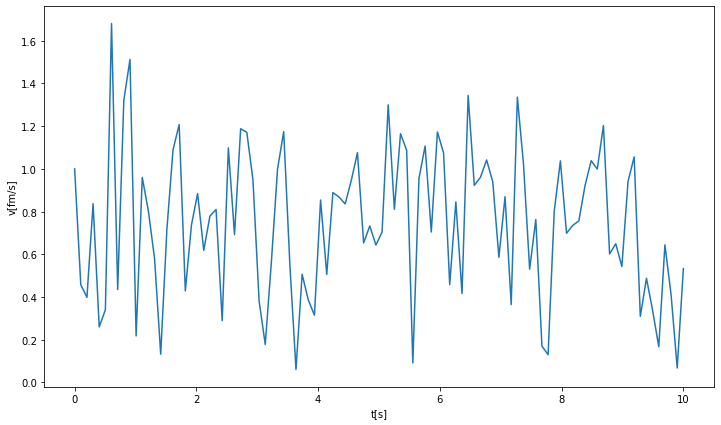

In [65]:
fig = plt.figure(figsize=(12, 7))
plt.plot(time_uniform, v_uniform)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("v[fm/s]")
plt.savefig('v_uniforme_2D.png', bbox_inches='tight')

Función gaussiana normal

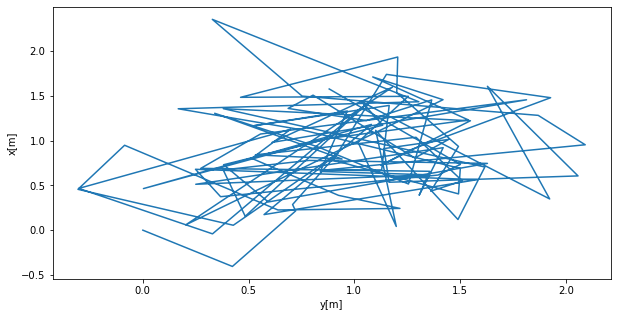

In [66]:
# Posición
time_gauss_1 = np.linspace(0, 10,100) #random time
x_gauss_1 = Gaussian(len(time_gauss_1)) + x  #Suma de la ecuación estocástica y la determinista
x_gauss_1[0]=0

y_gauss_1 = Gaussian(len(time_gauss_1)) + y  
y_gauss_1[0]=0

fig = plt.figure(figsize=(10, 5))
plt.plot(y_gauss_1, x_gauss_1)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("y[m]")
plt.ylabel("x[m]")
plt.savefig('Posicion_gauss_2D.png', bbox_inches='tight')

In [67]:
r_gauss=np.zeros(len(x_gauss_1))
for i in range (1,len(x_gauss_1)):
    r_gauss[i] = sqrt((x_gauss_1[i])**2+(y_gauss_1[i])**2)

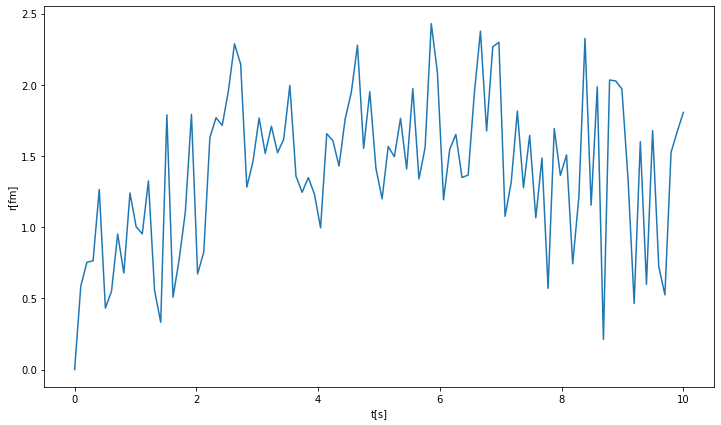

In [68]:
fig = plt.figure(figsize=(12, 7))
plt.plot(time_gauss_1, r_gauss)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("r[fm]")
plt.savefig('R_gauss_2D.png', bbox_inches='tight')

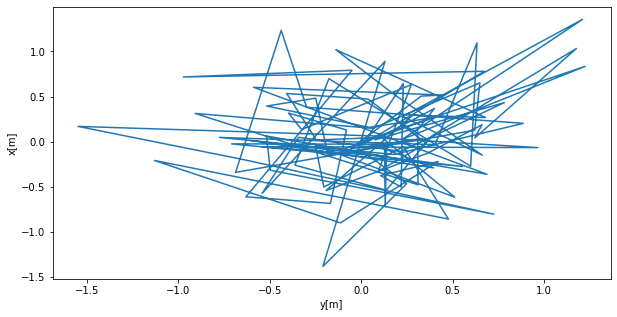

In [69]:
# Velocidad
time_gauss_1 = np.linspace(0, 10,100) #random time
v_x_gauss_1 = Gaussian(len(time_gauss_1)) + v_x  #Suma de la ecuación estocástica y la determinista
v_x_gauss_1[0]=0

v_y_gauss_1 = Gaussian(len(time_gauss_1)) + v_y  
v_y_gauss_1[0]=0

fig = plt.figure(figsize=(10, 5))
plt.plot(v_y_gauss_1, v_x_gauss_1)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("y[m]")
plt.ylabel("x[m]")
plt.savefig('Velocidad_gauss_2D.png', bbox_inches='tight')

In [70]:
v_gauss=np.zeros(len(v_x_gauss_1))
v_gauss[0]=1
for i in range (1,len(v_x_gauss_1)):
    v_gauss[i] = sqrt((v_x_gauss_1[i])**2+(v_y_gauss_1[i])**2)


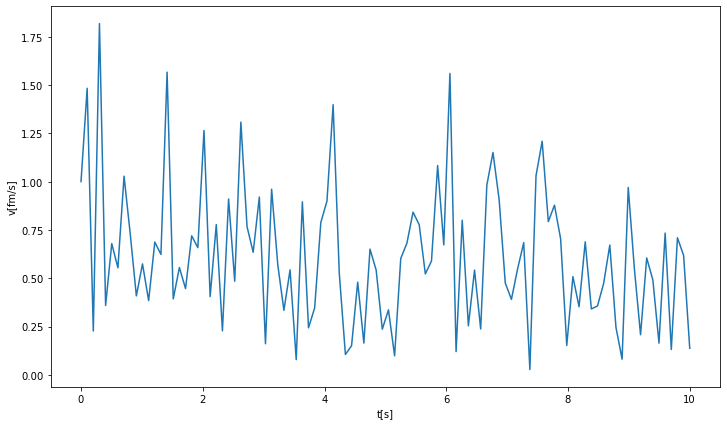

In [71]:
fig = plt.figure(figsize=(12, 7))
plt.plot(time_gauss_1, v_gauss)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("v[fm/s]")
plt.savefig('v_gauss_2D.png', bbox_inches='tight')

Función gaussiana acumulativa

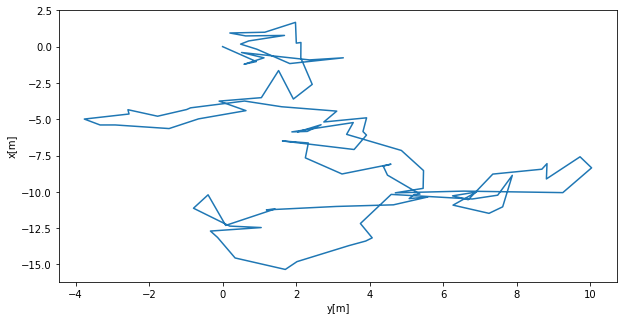

In [77]:
# Posición
time_normal_1 = np.linspace(0, 10,100) #random time
x_normal_1 = NormalRandom(len(time_gauss_1)) + x  #Suma de la ecuación estocástica y la determinista
x_normal_1[0]=0

y_normal_1 = NormalRandom(len(time_gauss_1)) + y  
y_normal_1[0]=0

fig = plt.figure(figsize=(10, 5))
plt.plot(y_normal_1, x_normal_1)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("y[m]")
plt.ylabel("x[m]")
plt.savefig('Posicion_acumulativa_2D.png', bbox_inches='tight')

In [78]:
r_normal=np.zeros(len(x_normal_1))
for i in range (1,len(x_normal_1)):
    r_normal[i] = sqrt((x_normal_1[i])**2+(y_normal_1[i])**2)

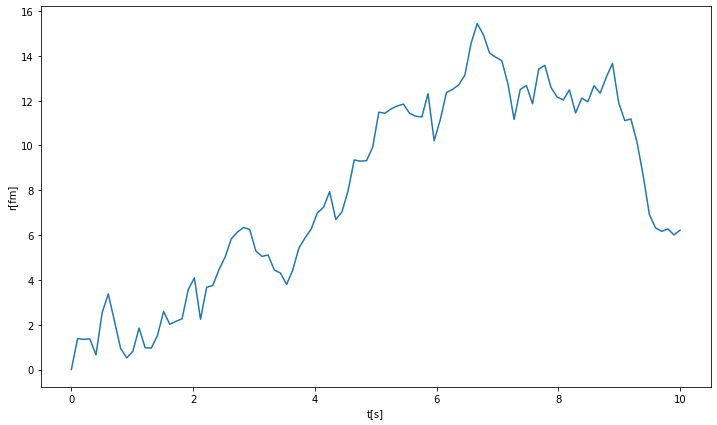

In [79]:
fig = plt.figure(figsize=(12, 7))
plt.plot(time_normal_1, r_normal)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("r[fm]")
plt.savefig('R_normal_2D.png', bbox_inches='tight')

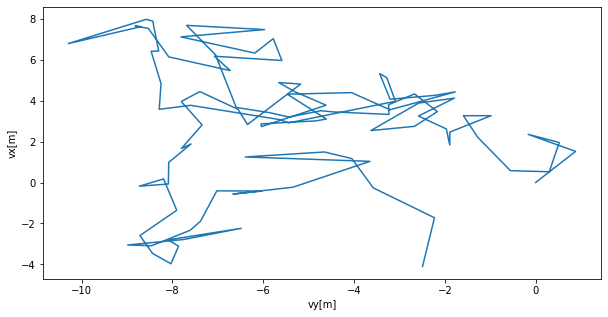

In [84]:
# Velocidad
time_normal_1 = np.linspace(0, 10,100) #random time
v_x_normal_1 = NormalRandom(len(time_gauss_1)) + v_x  #Suma de la ecuación estocástica y la determinista
v_x_normal_1[0]=0

v_y_normal_1 = NormalRandom(len(time_gauss_1)) + v_y  
v_y_normal_1[0]=0

fig = plt.figure(figsize=(10, 5))
plt.plot(v_y_normal_1, v_x_normal_1)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("vy[m]")
plt.ylabel("vx[m]")
plt.savefig('Velocidad_acumulativa_2D.png', bbox_inches='tight')

In [85]:
v_normal=np.zeros(len(v_x_normal_1))
v_normal[0]=1
for i in range (1,len(v_x_normal_1)):
    v_normal[i] = sqrt((v_x_normal_1[i])**2+(v_y_normal_1[i])**2)


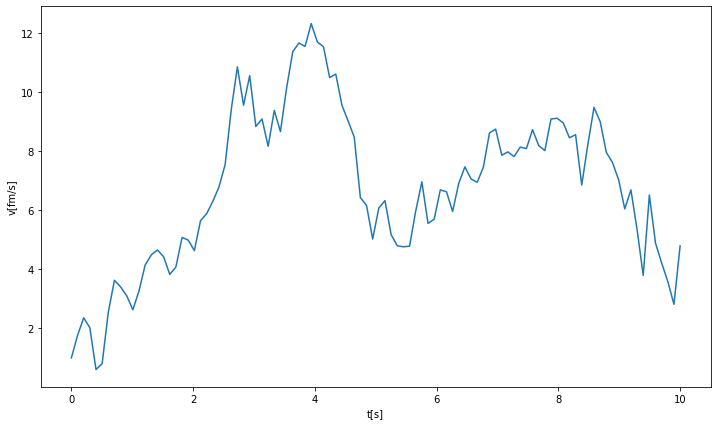

In [86]:
fig = plt.figure(figsize=(12, 7))
plt.plot(time_normal_1, v_normal)
#plt.title("Posición con función aleatoria uniforme")
plt.xlabel("t[s]")
plt.ylabel("v[fm/s]")
plt.savefig('v_normal_2D.png', bbox_inches='tight')